In [71]:
#import libraries
from sklearn.svm import LinearSVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [72]:
#load data
df=pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv',index_col='minute', parse_dates=True)
df.index = df.index.to_pydatetime()
df.shape

(1478, 6)

In [73]:
df = pd.DataFrame(df)
df

,ticker,instrument_token,open,high,low,close
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85
...,...,...,...,...,...,...
2022-12-26 09:15:00+05:30,NSEI,uf-n-1647516806122,17832.90,18084.10,17774.25,18010.30
2022-12-27 09:15:00+05:30,NSEI,uf-n-1647516806122,18081.90,18149.25,17967.45,18136.00
2022-12-28 09:15:00+05:30,NSEI,uf-n-1647516806122,18093.00,18173.10,18068.35,18109.25
2022-12-29 09:15:00+05:30,NSEI,uf-n-1647516806122,18059.80,18229.70,17992.80,18207.10


In [74]:
#prepare data for training SVR models
_df=df.head(len(df)-1)
_df = pd.DataFrame(_df)
_df.shape

(1477, 6)

In [75]:
_df.head

<bound method NDFrame.head of                           ticker    instrument_token      open      high  \
2017-01-02 09:15:00+05:30   NSEI  uf-n-1647516806122   8211.70   8211.70   
2017-01-03 09:15:00+05:30   NSEI  uf-n-1647516806122   8195.25   8219.00   
2017-01-04 09:15:00+05:30   NSEI  uf-n-1647516806122   8201.60   8218.45   
2017-01-05 09:15:00+05:30   NSEI  uf-n-1647516806122   8227.75   8282.55   
2017-01-06 09:15:00+05:30   NSEI  uf-n-1647516806122   8283.50   8306.50   
...                          ...                 ...       ...       ...   
2022-12-23 09:15:00+05:30   NSEI  uf-n-1647516806122  18003.25  18050.45   
2022-12-26 09:15:00+05:30   NSEI  uf-n-1647516806122  17832.90  18084.10   
2022-12-27 09:15:00+05:30   NSEI  uf-n-1647516806122  18081.90  18149.25   
2022-12-28 09:15:00+05:30   NSEI  uf-n-1647516806122  18093.00  18173.10   
2022-12-29 09:15:00+05:30   NSEI  uf-n-1647516806122  18059.80  18229.70   

                                low     close  
2017-01-0

In [76]:
_df.index

DatetimeIndex(['2017-01-02 09:15:00+05:30', '2017-01-03 09:15:00+05:30',
               '2017-01-04 09:15:00+05:30', '2017-01-05 09:15:00+05:30',
               '2017-01-06 09:15:00+05:30', '2017-01-09 09:15:00+05:30',
               '2017-01-10 09:15:00+05:30', '2017-01-11 09:15:00+05:30',
               '2017-01-12 09:15:00+05:30', '2017-01-13 09:15:00+05:30',
               ...
               '2022-12-16 09:15:00+05:30', '2022-12-19 09:15:00+05:30',
               '2022-12-20 09:15:00+05:30', '2022-12-21 09:15:00+05:30',
               '2022-12-22 09:15:00+05:30', '2022-12-23 09:15:00+05:30',
               '2022-12-26 09:15:00+05:30', '2022-12-27 09:15:00+05:30',
               '2022-12-28 09:15:00+05:30', '2022-12-29 09:15:00+05:30'],
              dtype='datetime64[ns, pytz.FixedOffset(330)]', length=1477, freq=None)

In [77]:
#independent and dependent data
days = [[0 for j in range(2)] for i in range(len(_df.index))]
close_price=[]

In [78]:
for i in range(len(_df.index)):
    days[i][0]=int(_df.index[i].month)
    days[i][1]=int(_df.index[i].year)
for close in _df.close:
    close_price.append(float(close))

In [79]:
#defining Linear SVR Model
lin_svr= LinearSVR(max_iter=10000)
print(lin_svr.fit(days,close_price))

LinearSVR(max_iter=10000)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


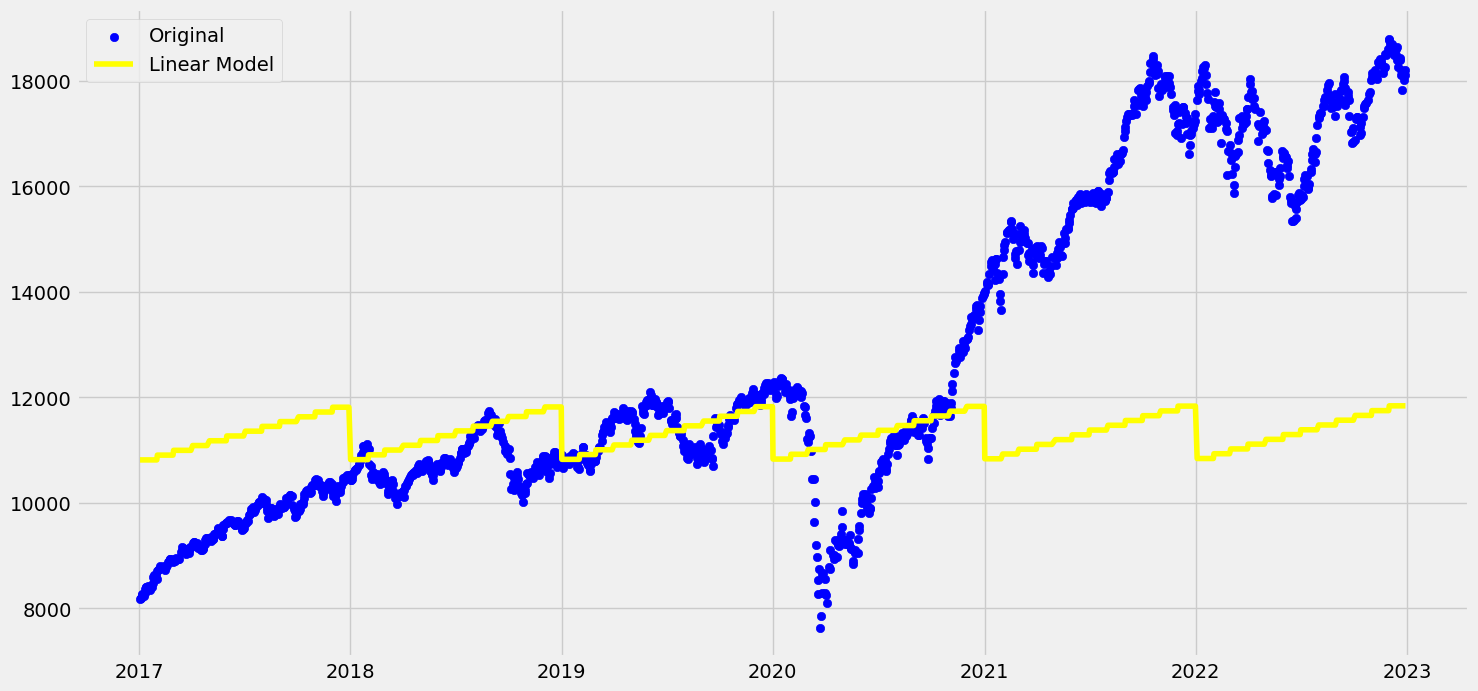

In [80]:
#plot data vs predictions
plt.figure(figsize=(16,8))
plt.scatter(_df.index,close_price,color='blue',label='Original')
plt.plot(_df.index,lin_svr.predict(days),color='yellow',label='Linear Model')
plt.legend()
plt.show()

In [81]:
#independent and dependent data
ohl = [[0 for j in range(3)] for i in range(len(_df.index))]
close_price=[]

In [82]:
j=0
for i in _df.index:
    ohl[j][0]=int(_df.loc[i].open)
    ohl[j][1]=int(_df.loc[i].high)
    ohl[j][2]=int(_df.loc[i].low)
    j=j+1
for close in _df.close:
    close_price.append(float(close))

In [83]:
#defining Linear SVR Model
lin_svr= LinearSVR(max_iter=10000)
print(lin_svr.fit(ohl,close_price))

LinearSVR(max_iter=10000)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


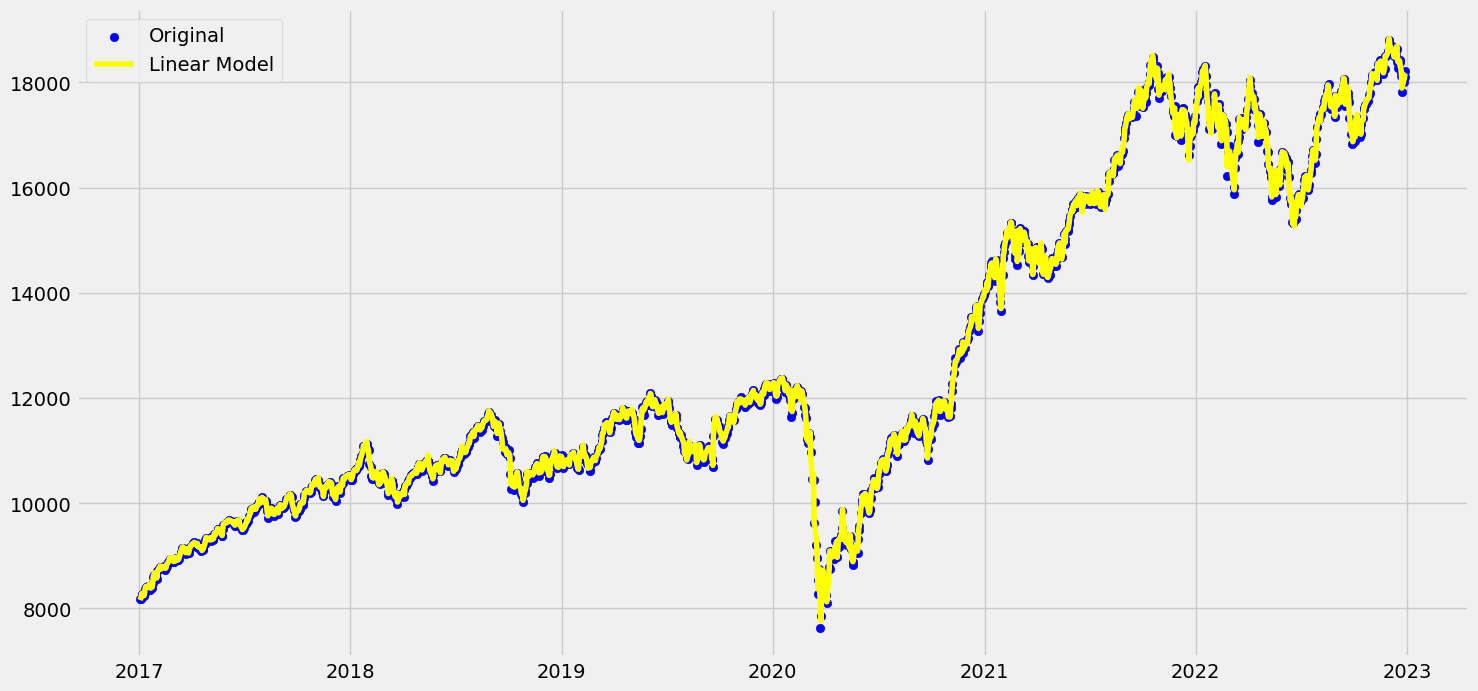

In [84]:
#new plot data vs predictions
plt.figure(figsize=(16,8))
plt.scatter(_df.index,close_price,color='blue',label='Original')
plt.plot(_df.index,lin_svr.predict(ohl),color='yellow',label='Linear Model')
plt.legend()
plt.show()